# Création de modèles sur base des donées externes

## Initialisation et importation des données

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pplt
from datetime import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving external_survey_prepared.xlsx to external_survey_prepared.xlsx


In [ ]:
import io
pd.set_option('display.max_column',169)
pd.set_option('display.max_row',169)
df = pd.read_excel(io.BytesIO(data_to_load['external_survey_prepared.xlsx']))
print(df.shape)
df.head()

(440, 37)


,Horodateur,Combien de lignes de téléphonie mobile possédez-vous ?,Avec quel opérateur de téléphonie mobile êtes-vous abonné(e) ?,operator_bis,Quelle est la ligne que vous utilisez le plus souvent ?,"Quel est votre niveau de satisfaction global à l'égard de cet opérateur (qualité du réseau, services offerts, tarifs...) ?","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Couverture du territoire]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Qualité auditive des communications]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Qualité de connexion à l'Internet]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Offres commercialisés]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Promotions & Bonus]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Tarifs des communications locales]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Tarifs des communications internationales]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service du roaming international]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service de l'Internet mobile]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service des SMS]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service clientèle]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service des agences commerciales]","A l'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Facturation ]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Couverture du territoire]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Qualité auditive des communications]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Qualité de connexion à l'Internet]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Offres commercialisés]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Promotions & Bonus]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Tarifs des communications locales]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Tarifs des communications internationales]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Tarifs du roaming international]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner le niveau d'importance que vous y accordez [Tarifs de l'Internet mobile]","Les critères n'ont pas sans doute tous la même importance à vos yeux. Pour chacun d'eux, veuillez me donner

## Préparation

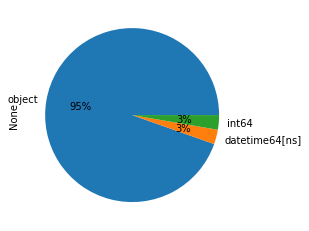

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
#plt.figure(figsize=(20,10))
#sns.heatmap(df.isnull())


In [ ]:
#nb de valeurs manquantes
#(df.isna().sum().sum())#total


### Renommage des colonnes

In [ ]:
df.rename(
    columns={
        'Combien de lignes de téléphonie mobile possédez-vous ?':'nb_lines',
        'Avec quel opérateur de téléphonie mobile êtes-vous abonné(e) ?':'operator',
        'Avec quel opérateur de téléphonie mobile êtes-vous abonné(e) ? bis':'opert_bis',
        'Quelle est la ligne que vous utilisez le plus souvent ?':'most_used_line',
        'Quel est votre niveau de satisfaction global à l\'égard de cet opérateur (qualité du réseau, services offerts, tarifs...) ?':'satis_global_operator',

        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Couverture du territoire]':'satis_coverage',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Qualité auditive des communications]':'satis_audio',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Qualité de connexion à l\'Internet]':'satis_internet_connect',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Offres commercialisés]':'satis_offers',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Promotions & Bonus]':'satis_bonus',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Tarifs des communications locales]':'satis_local_tarif',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Tarifs des communications internationales]':'satis_international_tarif',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service du roaming international]':'satis_roaming',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service de l\'Internet mobile]':'satis_mobile_internet',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service des SMS]':'satis_sms',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service clientèle]':'satis_cr',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Service des agences commerciales]':'satis_stores',
        'A l\'égard de ce même opérateur, veuillez me donner votre niveau de satisfaction par rapport aux critères suivants: [Facturation ]':'satis_invoice',

        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Couverture du territoire]':'import_coverage',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Qualité auditive des communications]':'import_audio',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Qualité de connexion à l\'Internet]':'import_internet_connct',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Offres commercialisés]':'import_offers',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Promotions & Bonus]':'import_bonus',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Tarifs des communications locales]':'import_local_tarif',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Tarifs des communications internationales]':'import_international_tarif',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Tarifs du roaming international]':'import_roaming_tarif',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Tarifs de l\'Internet mobile]':'import_mobile_internet_tarif',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Tarifs des SMS]':'import_sms_tarif',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Service clientèle]':'import_cr',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Service des agences commerciales]':'import_stores',
        'Les critères n\'ont pas sans doute tous la même importance à vos yeux. Pour chacun d\'eux, veuillez me donner le niveau d\'importance que vous y accordez [Facturation]':'import_invoice',

        'Dans quel gouvernorat vous passez le plus de temps ? (lieu d\'habitat / lieu de travail / lieu d\'étude ...)':'governortate',        
        'Quel est vote sexe ?':'gender',
        'Quel est votre âge ?':'age',
        'Vous êtes ':'occupation',
        'Dans quel secteur d’activité  travaillez-vous?':'occupation_sector'
     
    },inplace = True)

df.columns

Index(['Horodateur', 'nb_lines', 'operator', 'operator_bis', 'most_used_line',
       'satis_global_operator', 'satis_coverage', 'satis_audio',
       'satis_internet_connect', 'satis_offers', 'satis_bonus',
       'satis_local_tarif', 'satis_international_tarif', 'satis_roaming',
       'satis_mobile_internet', 'satis_sms', 'satis_cr', 'satis_stores',
       'satis_invoice', 'import_coverage', 'import_audio',
       'import_internet_connct', 'import_offers', 'import_bonus',
       'import_local_tarif', 'import_international_tarif',
       'import_roaming_tarif', 'import_mobile_internet_tarif',
       'import_sms_tarif', 'import_cr', 'import_stores', 'import_invoice',
       'governortate', 'gender', 'age', 'occupation', 'occupation_sector'],
      dtype='object')

In [ ]:
df.head()

,Horodateur,nb_lines,operator,operator_bis,most_used_line,satis_global_operator,satis_coverage,satis_audio,satis_internet_connect,satis_offers,satis_bonus,satis_local_tarif,satis_international_tarif,satis_roaming,satis_mobile_internet,satis_sms,satis_cr,satis_stores,satis_invoice,import_coverage,import_audio,import_internet_connct,import_offers,import_bonus,import_local_tarif,import_international_tarif,import_roaming_tarif,import_mobile_internet_tarif,import_sms_tarif,import_cr,import_stores,import_invoice,governortate,gender,age,occupation,occupation_sector
0,2021-02-23 11:02:56.028,1 ligne,Orange,NaN,NaN,7,Assez Satisfait,Assez Insatisfait,Indifférent,Indifférent,Indifférent,Indifférent,Indifférent,Assez Satisfait,Très Satisfait,Indifférent,Indifférent,Assez Insatisfait,Indifférent,Assez Important,Assez Important,Très Important,Peu Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Très Important,Peu Important,Très Important,Très Important,Très Important,Tunis,Masculin,25-34 ans,Etudiant,NaN
1,2021-02-23 11:03:52.689,1 ligne,Orange,NaN,NaN,8,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,NaN,NaN,NaN,NaN,NaN,Tunis,Masculin,18-24 ans,Etudiant,NaN
2,2021-02-23 11:13:59.444,2 lignes ou plus,NaN,"Orange, Tunisie Télécom",Tunisie Télécom,6,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Très Satisfait,Assez Insatisfait,Assez Satisfait,Indifférent,Indifférent,Très Satisfait,Assez Insatisfait,Assez Satisfait,Très Insatisfait,Peu Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Ben Arous,Masculin,18-24 ans,Etudiant,NaN
3,2021-02-23 11:57:20.768,2 lignes ou plus,NaN,"Orange, Ooredoo",Orange,8,Indifférent,Assez Satisfait,Très Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Moyennement Important,Très Important,Très Important,Assez Important,Très Important,Assez Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Tunis,Féminin,18-24 ans,Etudiant,NaN
4,2021-02-23 12:02:26.555,1 ligne,Ooredoo,NaN,NaN,4,Assez Insatisfait,Assez Insatisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Important,Très Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Ariana,Féminin,18-24 ans,Etudiant,NaN


In [ ]:
#combiner les colonnes operator et most_used_line 
df['operator'] = df['operator'].str.cat(df['most_used_line'],sep="",na_rep="")
# df = df.drop('opert_bis',axis='columns')
df = df.drop('most_used_line',axis='columns')

df.head()

,Horodateur,nb_lines,operator,operator_bis,satis_global_operator,satis_coverage,satis_audio,satis_internet_connect,satis_offers,satis_bonus,satis_local_tarif,satis_international_tarif,satis_roaming,satis_mobile_internet,satis_sms,satis_cr,satis_stores,satis_invoice,import_coverage,import_audio,import_internet_connct,import_offers,import_bonus,import_local_tarif,import_international_tarif,import_roaming_tarif,import_mobile_internet_tarif,import_sms_tarif,import_cr,import_stores,import_invoice,governortate,gender,age,occupation,occupation_sector
0,2021-02-23 11:02:56.028,1 ligne,Orange,NaN,7,Assez Satisfait,Assez Insatisfait,Indifférent,Indifférent,Indifférent,Indifférent,Indifférent,Assez Satisfait,Très Satisfait,Indifférent,Indifférent,Assez Insatisfait,Indifférent,Assez Important,Assez Important,Très Important,Peu Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Très Important,Peu Important,Très Important,Très Important,Très Important,Tunis,Masculin,25-34 ans,Etudiant,NaN
1,2021-02-23 11:03:52.689,1 ligne,Orange,NaN,8,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,NaN,NaN,NaN,NaN,NaN,Tunis,Masculin,18-24 ans,Etudiant,NaN
2,2021-02-23 11:13:59.444,2 lignes ou plus,Tunisie Télécom,"Orange, Tunisie Télécom",6,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Très Satisfait,Assez Insatisfait,Assez Satisfait,Indifférent,Indifférent,Très Satisfait,Assez Insatisfait,Assez Satisfait,Très Insatisfait,Peu Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Ben Arous,Masculin,18-24 ans,Etudiant,NaN
3,2021-02-23 11:57:20.768,2 lignes ou plus,Orange,"Orange, Ooredoo",8,Indifférent,Assez Satisfait,Très Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Moyennement Important,Très Important,Très Important,Assez Important,Très Important,Assez Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Tunis,Féminin,18-24 ans,Etudiant,NaN
4,2021-02-23 12:02:26.555,1 ligne,Ooredoo,NaN,4,Assez Insatisfait,Assez Insatisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Important,Très Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Ariana,Féminin,18-24 ans,Etudiant,NaN


In [ ]:
#Horodateur
# print(df['Horodateur'].unique())

# On remarque que toutes  les réponses ont eu lieu à quelques jours d'intervalle. ==> peu de pertinence
df = df.drop('Horodateur',axis='columns')
# df.columns

In [ ]:
#occupation_sector
# Colonne non pertinente.
df = df.drop('occupation_sector',axis='columns')
#df=df.drop('operator_bis',axis='columns')
# df.columns

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

nb_lines                        0.000000
gender                          0.000000
governortate                    0.000000
age                             0.000000
satis_stores                    0.000000
satis_cr                        0.000000
satis_sms                       0.000000
satis_mobile_internet           0.000000
satis_roaming                   0.000000
satis_international_tarif       0.000000
satis_invoice                   0.000000
satis_bonus                     0.000000
operator                        0.000000
satis_local_tarif               0.000000
satis_global_operator           0.000000
occupation                      0.000000
satis_audio                     0.000000
satis_offers                    0.000000
satis_coverage                  0.000000
satis_internet_connect          0.000000
import_internet_connct          0.063636
import_mobile_internet_tarif    0.070455
import_roaming_tarif            0.070455
import_coverage                 0.070455
import_stores   

In [ ]:
# imputation des données nulles <0.1
for col in df.columns:
    if((df[col].isna().sum()/df.shape[0])<=0.1):
        df[col] = df[col].fillna(df[col].mode()[0])



In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

nb_lines                        0.000000
gender                          0.000000
governortate                    0.000000
import_invoice                  0.000000
import_stores                   0.000000
import_cr                       0.000000
import_sms_tarif                0.000000
import_mobile_internet_tarif    0.000000
import_roaming_tarif            0.000000
import_international_tarif      0.000000
import_local_tarif              0.000000
import_bonus                    0.000000
import_offers                   0.000000
import_internet_connct          0.000000
import_audio                    0.000000
import_coverage                 0.000000
satis_invoice                   0.000000
satis_stores                    0.000000
operator                        0.000000
satis_global_operator           0.000000
satis_coverage                  0.000000
satis_audio                     0.000000
satis_internet_connect          0.000000
age                             0.000000
satis_offers    

### Encodage

In [ ]:
#encodage colonnes categorielles à deux modalités
categorical_cols2 = df.columns[((df.nunique()==2) & (df.dtypes==object))].tolist()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[categorical_cols2] = df[categorical_cols2].apply(lambda col: le.fit_transform(col))
 
print(len(categorical_cols2),' colonnes categorielles à deux modalité:\n',categorical_cols2)
df


2  colonnes categorielles à deux modalité:
 ['nb_lines', 'gender']


,nb_lines,operator,operator_bis,satis_global_operator,satis_coverage,satis_audio,satis_internet_connect,satis_offers,satis_bonus,satis_local_tarif,satis_international_tarif,satis_roaming,satis_mobile_internet,satis_sms,satis_cr,satis_stores,satis_invoice,import_coverage,import_audio,import_internet_connct,import_offers,import_bonus,import_local_tarif,import_international_tarif,import_roaming_tarif,import_mobile_internet_tarif,import_sms_tarif,import_cr,import_stores,import_invoice,governortate,gender,age,occupation
0,0,Orange,NaN,7,Assez Satisfait,Assez Insatisfait,Indifférent,Indifférent,Indifférent,Indifférent,Indifférent,Assez Satisfait,Très Satisfait,Indifférent,Indifférent,Assez Insatisfait,Indifférent,Assez Important,Assez Important,Très Important,Peu Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Très Important,Peu Important,Très Important,Très Important,Très Important,Tunis,1,25-34 ans,Etudiant
1,0,Orange,NaN,8,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Peu Important,Très Important,Très Important,Très Important,Moyennement Important,Moyennement Important,Tunis,1,18-24 ans,Etudiant
2,1,Tunisie Télécom,"Orange, Tunisie Télécom",6,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Très Satisfait,Assez Insatisfait,Assez Satisfait,Indifférent,Indifférent,Très Satisfait,Assez Insatisfait,Assez Satisfait,Très Insatisfait,Peu Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Ben Arous,1,18-24 ans,Etudiant
3,1,Orange,"Orange, Ooredoo",8,Indifférent,Assez Satisfait,Très Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Moyennement Important,Très Important,Très Important,Assez Important,Très Important,Assez Important,Moyennement Important,Moyennement Important,Moyennement Important,Assez Important,Assez Important,Assez Important,Moyennement Important,Tunis,0,18-24 ans,Etudiant
4,0,Ooredoo,NaN,4,Assez Insatisfait,Assez Insatisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Insatisfait,Assez Insatisfait,Assez Insatisfait,Indifférent,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Assez Important,Très Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Moyennement Important,Très Important,Ariana,0,18-24 ans,Etudiant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,Ooredoo,NaN,6,Assez Satisfait,Indifférent,Assez Insatisfait,Assez Insatisfait,Très Insatisfait,Indifférent,Assez Insatisfait,Très Insatisfait,Très Insatisfait,Indifférent,Indifférent,Très Insatisfait,Très Insatisfait,Peu Important,Pas du tout Important,Pas du tout Important,Pas du tout Important,Peu Important,Assez Important,Moyennement Important,Moyennement Important,Assez Important,Moyennement Important,Assez Important,Moyennement Important,Moyennement Important,Béjà,1,18-24 ans,Etudiant
436,0,Tunisie Télécom,NaN,6,Assez Insatisfait,Assez Satisfait,Assez Insatisfait,Indifférent,Indifférent,Assez Satisfait,Très Insatisfait,Assez Insatisfait,Assez Insatisfait,Assez Satisfait,Assez Satisfait,Assez Satisfait,Indifférent,Assez Important,Très Important,Très Important,Moyennement Important,Peu Important,Moyennement Important,Assez Important,Assez Important,Moyennement Important,Moyennement Impo

In [ ]:
# Encodage des questions de satisfaction
# print(df['satis_global_operator'].value_counts())

df['satis_coverage']=df['satis_coverage'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_audio']=df['satis_audio'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_internet_connect']=df['satis_internet_connect'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_offers']=df['satis_offers'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_bonus']=df['satis_bonus'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_local_tarif']=df['satis_local_tarif'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_international_tarif']=df['satis_international_tarif'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_roaming']=df['satis_roaming'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_mobile_internet']=df['satis_mobile_internet'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_sms']=df['satis_sms'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_cr']=df['satis_cr'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_stores']=df['satis_stores'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])
df['satis_invoice']=df['satis_invoice'].replace(['Très Insatisfait','Assez Insatisfait','Indifférent','Assez Satisfait','Très Satisfait'],[-2,-1,0,1,2])

In [ ]:
# Encodage des questions de classement d'importance

df['import_coverage']=df['import_coverage'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_audio']=df['import_audio'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_internet_connct']=df['import_internet_connct'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_offers']=df['import_offers'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_bonus']=df['import_bonus'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_local_tarif']=df['import_local_tarif'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_international_tarif']=df['import_international_tarif'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_roaming_tarif']=df['import_roaming_tarif'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_mobile_internet_tarif']=df['import_mobile_internet_tarif'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_sms_tarif']=df['import_sms_tarif'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_cr']=df['import_cr'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_stores']=df['import_stores'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])
df['import_invoice']=df['import_invoice'].replace(['Pas du tout Important','Peu Important','Moyennement Important','Assez Important','Très Important'],[-2,-1,0,1,2])

# df


In [ ]:
#Numérisation des valeurs encodées


In [ ]:
df['satis_global_operator'] =df['satis_global_operator'].apply(pd.to_numeric, errors='ignore')
df['import_coverage'] =df['import_coverage'].apply(pd.to_numeric, errors='ignore')
df['import_audio'] =df['import_audio'].apply(pd.to_numeric, errors='ignore')
df['import_internet_connct'] =df['import_internet_connct'].apply(pd.to_numeric, errors='ignore')
df['import_offers'] =df['import_offers'].apply(pd.to_numeric, errors='ignore')
df['import_bonus'] =df['import_bonus'].apply(pd.to_numeric, errors='ignore')
df['import_local_tarif'] =df['import_local_tarif'].apply(pd.to_numeric, errors='ignore')
df['import_international_tarif'] =df['import_international_tarif'].apply(pd.to_numeric, errors='ignore')
df['import_roaming_tarif'] =df['import_roaming_tarif'].apply(pd.to_numeric, errors='ignore')
df['import_mobile_internet_tarif'] =df['import_mobile_internet_tarif'].apply(pd.to_numeric, errors='ignore')
df['import_sms_tarif'] =df['import_sms_tarif'].apply(pd.to_numeric, errors='ignore')
df['import_cr'] =df['import_cr'].apply(pd.to_numeric, errors='ignore')
df['import_stores'] =df['import_stores'].apply(pd.to_numeric, errors='ignore')
df['import_invoice'] =df['import_invoice'].apply(pd.to_numeric, errors='ignore')


-----------------------------TYPE OBJET----------------------------------
*** operator  :( 3 )
 ['Orange' 'Tunisie Télécom' 'Ooredoo']

*** occupation  :( 3 )
 ['Etudiant' 'Employé' 'Autres']

*** operator_bis  :( 4 )
 [nan 'Orange, Tunisie Télécom' 'Orange, Ooredoo'
 'Tunisie Télécom, Ooredoo' 'Orange, Tunisie Télécom, Ooredoo']

*** age  :( 5 )
 ['25-34 ans' '18-24 ans' '50-59 ans' '35-49 ans' 'Moins de 18 ans']

*** governortate  :( 16 )
 ['Tunis' 'Ben Arous' 'Ariana' 'Tataouine' 'Sfax' 'Mahdia' 'Monastir'
 'Sousse' 'Mannouba' 'Béjà' 'Gabès' 'Bizerte' 'Nabeul' 'Kasserine'
 'Zaghouan' 'Kébili']

-----------------------------TYPE NUMERIQUE----------------------------------
*** nb_lines  :( 2 )
 [0 1]

*** gender  :( 2 )
 [1 0]

*** satis_coverage  :( 5 )
 [ 1 -1  0  2 -2]

*** import_stores  :( 5 )
 [ 2  0  1 -1 -2]

*** import_cr  :( 5 )
 [ 2  1  0 -1 -2]

*** import_sms_tarif  :( 5 )
 [-1  2  1  0 -2]

*** import_mobile_internet_tarif  :( 5 )
 [ 2  0  1 -1 -2]

*** import_roaming_ta

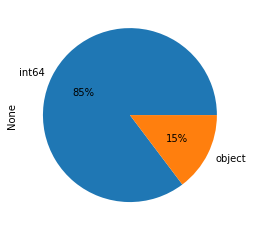

In [ ]:
#affichage des modalites des colonnes de type objet restantes
print("-----------------------------TYPE OBJET----------------------------------")
categorical_cols2222=df.columns[((df.dtypes==object))].tolist()
for col in (df[categorical_cols2222].nunique().sort_values().index):
    print('***',col,' :(',df[col].nunique(),')\n',df[col].unique())
    print()
print("-----------------------------TYPE NUMERIQUE----------------------------------")
categorical_cols2233=df.columns[((df.dtypes!=object))].tolist()
for col in (df[categorical_cols2233].nunique().sort_values().index):
    print('***',col,' :(',df[col].nunique(),')\n',df[col].unique())
    print()
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
#Encodage des questions restantes 
encoded_data = pd.get_dummies(df, prefix_sep='_', drop_first=True)
print(df.shape)
print(encoded_data.shape)
encoded_data.head()

(440, 34)
(440, 55)


,nb_lines,satis_global_operator,satis_coverage,satis_audio,satis_internet_connect,satis_offers,satis_bonus,satis_local_tarif,satis_international_tarif,satis_roaming,satis_mobile_internet,satis_sms,satis_cr,satis_stores,satis_invoice,import_coverage,import_audio,import_internet_connct,import_offers,import_bonus,import_local_tarif,import_international_tarif,import_roaming_tarif,import_mobile_internet_tarif,import_sms_tarif,import_cr,import_stores,import_invoice,gender,operator_Orange,operator_Tunisie Télécom,"operator_bis_Orange, Tunisie Télécom","operator_bis_Orange, Tunisie Télécom, Ooredoo","operator_bis_Tunisie Télécom, Ooredoo",governortate_Ben Arous,governortate_Bizerte,governortate_Béjà,governortate_Gabès,governortate_Kasserine,governortate_Kébili,governortate_Mahdia,governortate_Mannouba,governortate_Monastir,governortate_Nabeul,governortate_Sfax,governortate_Sousse,governortate_Tataouine,governortate_Tunis,governortate_Zaghouan,age_25-34 ans,age_35-49 ans,age_50-59 ans,age_Moins de 18 ans,occupation_Employé,occupation_Etudiant
0,0,7,1,-1,0,0,0,0,0,1,2,0,0,-1,0,1,1,2,-1,0,1,0,1,2,-1,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,0,8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,6,1,1,1,1,2,-1,1,0,0,2,-1,1,-2,-1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,8,0,1,2,1,1,1,0,0,1,1,1,1,0,0,2,2,1,2,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,4,-1,-1,1,1,1,-1,-1,-1,0,1,1,1,1,1,2,2,0,0,2,0,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Corrélation de Pearson

In [ ]:
def histogram_intersection(x, y):
    v = np.corrcoef(x, y)
    return v[0, 1]
cor_matrix = df.corr(method=histogram_intersection)
cor_matrix<-0.65
abs(cor_matrix)>0.65

,nb_lines,satis_global_operator,satis_coverage,satis_audio,satis_internet_connect,satis_offers,satis_bonus,satis_local_tarif,satis_international_tarif,satis_roaming,satis_mobile_internet,satis_sms,satis_cr,satis_stores,satis_invoice,import_coverage,import_audio,import_internet_connct,import_offers,import_bonus,import_local_tarif,import_international_tarif,import_roaming_tarif,import_mobile_internet_tarif,import_sms_tarif,import_cr,import_stores,import_invoice,gender
nb_lines,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_global_operator,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_coverage,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_audio,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_internet_connect,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_offers,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_bonus,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_local_tarif,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_international_tarif,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
satis_roaming,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


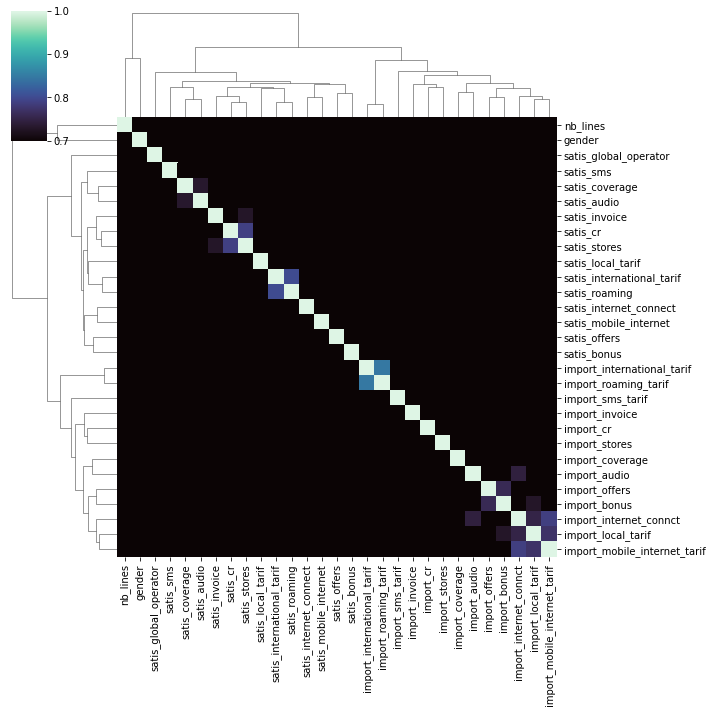

In [ ]:
sns.clustermap(df.corr(),cmap="mako", vmin=0.7, vmax=1)


Pas  de corrélations significatives.

### Centrage-Réduction


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

## Modélisation


### K-Means

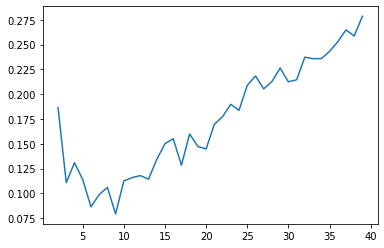

In [ ]:
#Modelisation
from sklearn import cluster 
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_km_tab = []
silhouette_km_tab = []
#Il y a 400 observations environ, testons avec  une limite de 40 clusters
for i in range(2,40):
    #modelisation
    kmeans = cluster.KMeans(n_clusters=i);
    kmeans.fit(scaled_data);
    # print(kmeans.labels_)
    y_pred_km_tab.append(kmeans.labels_)
    #evaluation
    score = silhouette_score(scaled_data, kmeans.labels_, metric='euclidean')
    silhouette_km = score
    # print(i,'Silhouette Score: %.3f' % score)
    silhouette_km_tab.append(silhouette_km)

plt.plot(range(2,40),silhouette_km_tab)

[0.18639629141971492, 0.11080558999096299, 0.13095929053644143, 0.11394917245003142, 0.08649693634704544, 0.09873307750624974, 0.10605476062551952, 0.07932925924706967, 0.11259602059261149, 0.11589902927580621, 0.11795001344720965, 0.11439401376532644, 0.13417095370141133, 0.1501022603435154, 0.15507145420787866, 0.12846942788746765, 0.1598621644862769, 0.14727094166562252, 0.14474833029303433, 0.1696616583173788, 0.17730507941471813, 0.18980628151428672, 0.1837159373901643, 0.2088037171815791, 0.21835488909267212, 0.20531092823684483, 0.21268762401974525, 0.22628376557943858, 0.21245726975699072, 0.21446505988808143, 0.23723918751494227, 0.23575017343424526, 0.23577894001075525, 0.24308722075188333, 0.2527664512658026, 0.2647310199920262, 0.25859759510954033, 0.2785159411227474]


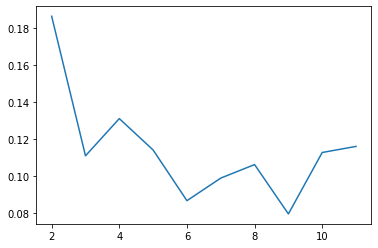

In [ ]:
plt.plot(range(2,12),silhouette_km_tab[:10])
print (silhouette_km_tab)
#valeur optimale du silhouette score  : 0.183 pour 2 clusters
silhouette_km = silhouette_km_tab[0]

In [ ]:
#modelisation
kmeans = cluster.KMeans(n_clusters=2, random_state=1);
kmeans.fit(scaled_data);
# print(kmeans.labels_)
#evaluation
score = silhouette_score(scaled_data, kmeans.labels_, metric='euclidean')
silhouette_km = score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.191


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

chi_kmeans = metrics.calinski_harabasz_score(scaled_data, kmeans.labels_)
print('Calinski-Harabasz Index : %.3f' %chi_kmeans)

Calinski-Harabasz Index : 65.488


Profiling

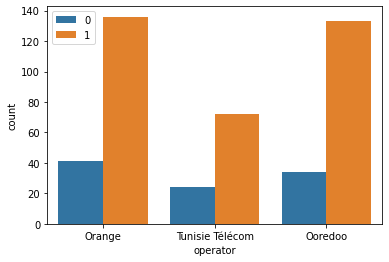

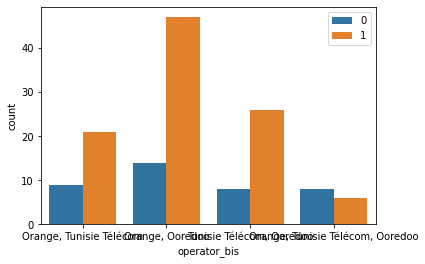

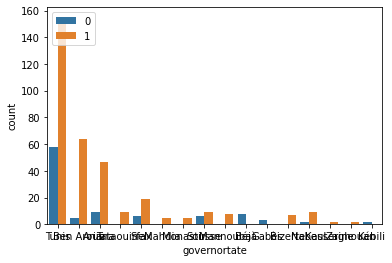

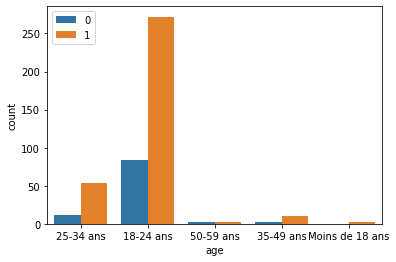

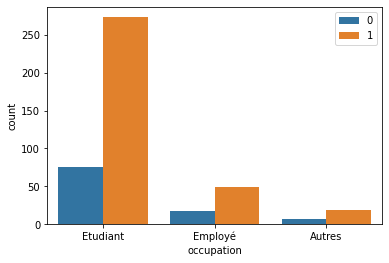

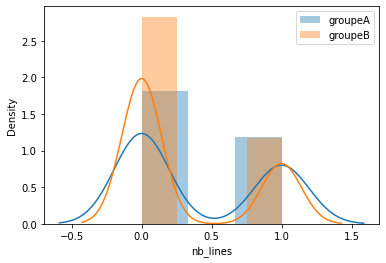

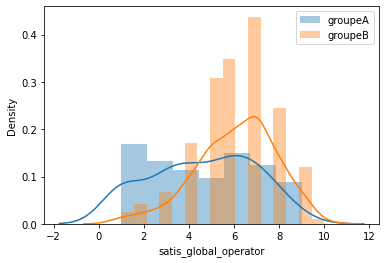

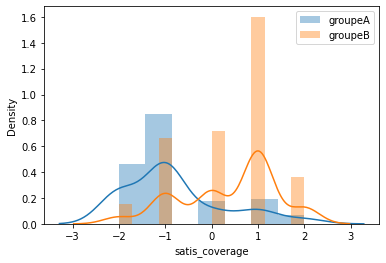

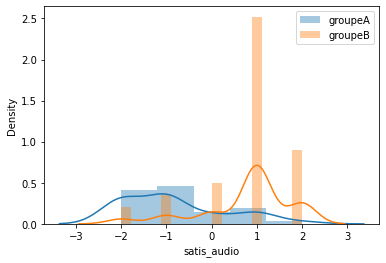

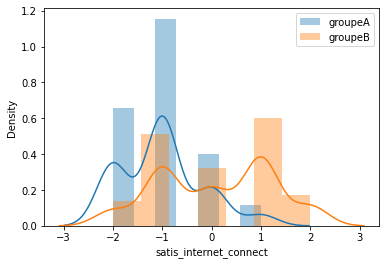

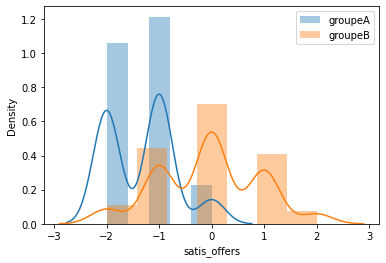

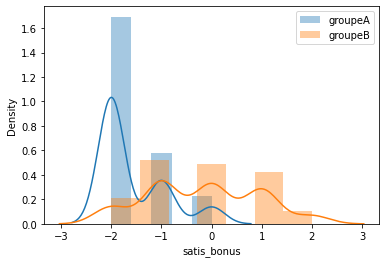

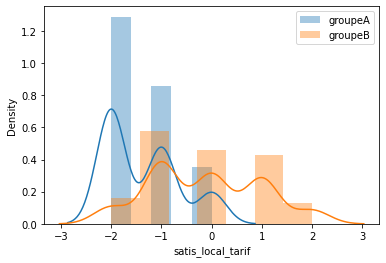

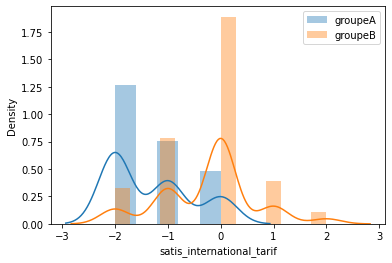

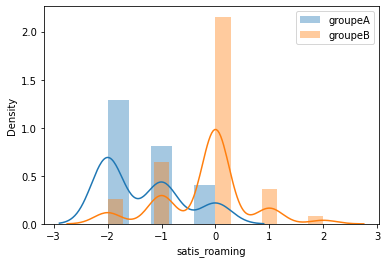

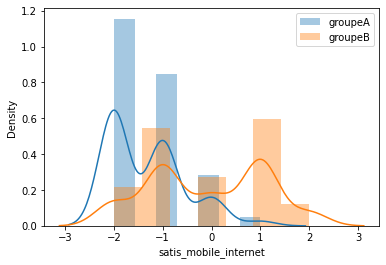

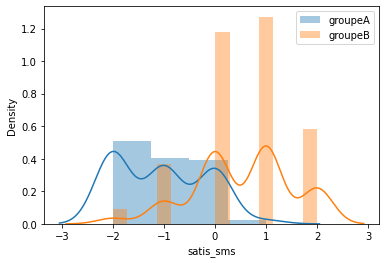

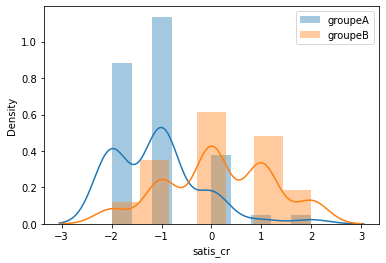

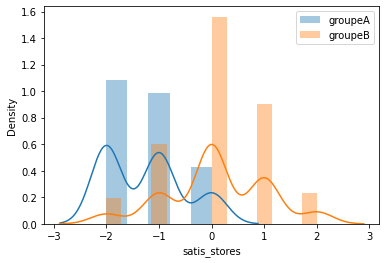

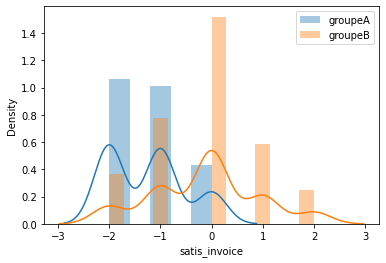

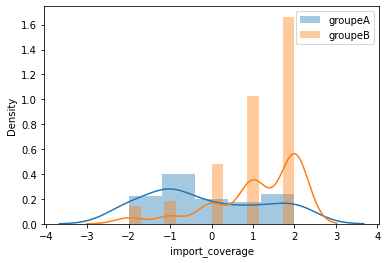

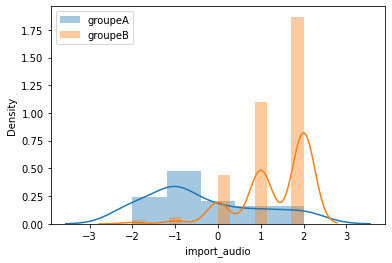

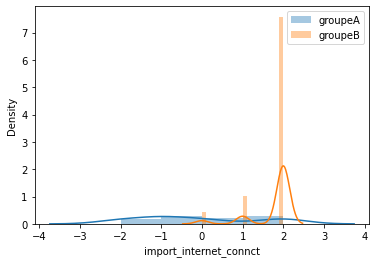

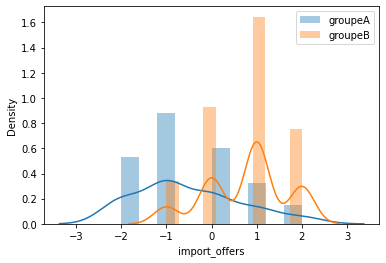

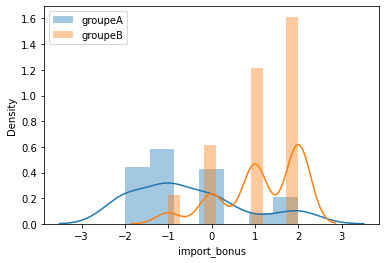

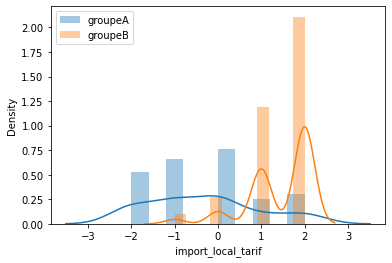

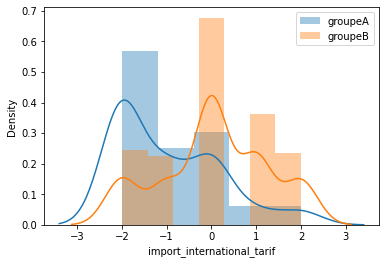

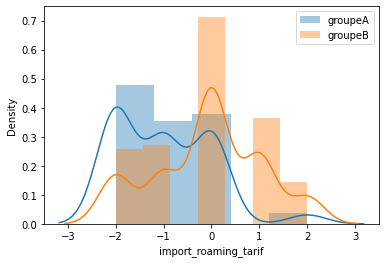

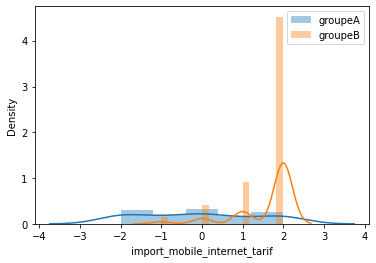

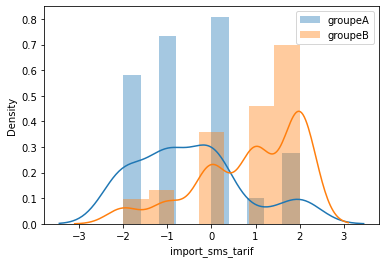

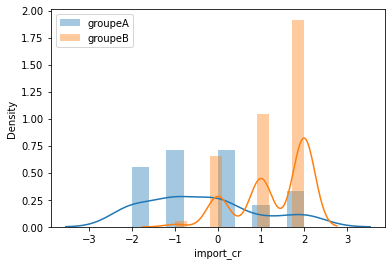

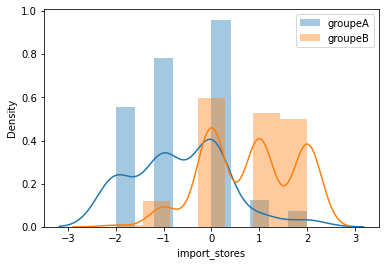

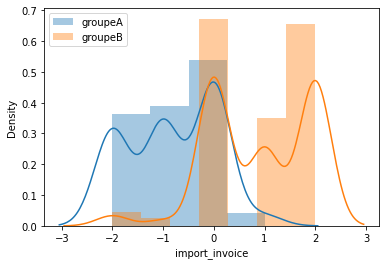

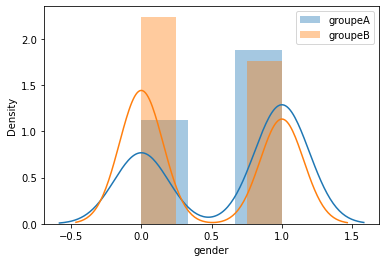

In [ ]:
import warnings
warnings.simplefilter('ignore', category=Warning)
# warnings.simplefilter('ignore', category=RuntimeWarning)
# warnings.simplefilter('ignore', category=FutureWarning)

groupeA=df[kmeans.labels_==0]
groupeB=df[kmeans.labels_==1]

data_predict = df.copy()
data_predict.insert(len(data_predict.columns), "Profiling_Kmeans", kmeans.labels_)
#df.insert(len(df.columns), "Profiling_Kmeans", kmeans.labels_)
#data_predict['Profiling'] = kmeans.labels_
#data_predict

for col in (data_predict.columns[data_predict.dtypes==object]): 
    plt.figure()
    sns.countplot(x=col,hue='Profiling_Kmeans',data=data_predict)
    plt.legend()
    
    
for col in (data_predict.columns[data_predict.dtypes!=object].drop('Profiling_Kmeans')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    plt.legend()



In [ ]:
# label = kmeans.fit_predict(encoded_data)

# #filter rows of original data
# filtered_label0 = encoded_data[label == 0]
# filtered_label1 = encoded_data[label == 1]

# # print(filtered_label0) #data frame

# #plotting the results
# for i in range (encoded_data.shape[1]):
#   for j in range (encoded_data.shape[1]):
#     pplt.scatter(filtered_label0.values[:,i] , filtered_label0.values[:,j])
#     plt.scatter(filtered_label1.values[:,i] , filtered_label1.values[:,j] , color = 'red')
#     pplt.show()




### Observations

Groupe A:
- Utilisation assez équilibrée des 3  opérateurs (TT en retrait)
- Majorité  moins marquée d'étudiants
- La majorité n'utilise qu'une seule  ligne
- Assez insatisfaits de la couverture réseau
- Insatisfaits de la qualité sonore des appels
- Assez  insatisfaits de la qualité de la connexion Internet
- Très insatisfaits des offres
- Très insatisfaits  de la tarification des appels internes
- Très insatisfaits  de la tarification des appels internationnaux
- Très insatisfaits  des tarifs de roaming
- Très insatisfaits des services internet mobile
- Très insatisfaits des services SMS
- Très insatisfaits du service client
- Très insatisfaits des agences et magasins
- Très insatisfaits de la facturation
- Accorde plus d'importance à la couverture réseaux.
- Accorde plus d'importance à la qualité des appels.
- Accorde beaucoup d'importance à  la qualité de la connexion à Internet.
- Accorde de l'importance aux offres
- Accorde de l'importance aux bonus
- Accorde beaucoup d'importance  aux tarifs des appels locaux
- Indifférents vis à  vis des coûts des appels internationnaux
- Plutôt indifférents aux roaming
- Très grande importance accordée aux tarifs  de l'internet mobile
- Très grande importance  accordée aux  tarifs des SMS
- Accorde beaucoup d'importance à  la relation client 
- Accorde de l'importance aux agences
- Majorité  indifférente à la facturation avec un autre  pic qui lui accorde beaucoup d'importance
- Représentation équilibrée des deux genres avec une légère majorité de femmes.    

Groupe B:
- Utilise Ooreedo et Orange	
- Plus grande proportion de jeunes
- Majorité d'étudiants
- La majorité n'utilise qu'une seule  ligne
- Plus satisfaits globalement: pic dense  et centré en 7
- Assez satisfaits de la couverture réseau
- Assez satisfaits de la qualité sonore des appels
- Egalment  partagés entre satisfaits et non satisfaits de la qualité de la  connexion  à Internet
- Indifférents vis à vis des offres
- Indifférents vis à vis des tarifs des appels internes
- Indifférents vis à vis des tarifs des appels internationnaux
- Indifférents vis à vis  des tarifs de roaming
- Satisfaits des services SMS
- Généralement indifférents vis à vis des services clients avec un autre pic satisfait
- Indifférents vis à vis des des magasins  / agences
- Indifférents à  la facturation
- Accorde peu d'importance   aux  offres
- N'accorde pas  d'importance  aux bonus
- Indifférents vis à vis de  l'importance des tarifs des appels locaux  
- Aucune importance accordée aux  tarifs internationnaux
- Aucune importance accordée au roaming 
- Pas d'importance accordée  aux  tarifs des SMS
- Plutôt indifférent quant au  service client
- Pas d'importance accordée  aux agences
- Majorité indifférente à  la facturation avec  un pic qui ne lui en accorde aucune.
- Deux fois plus d'hommes que de femmes



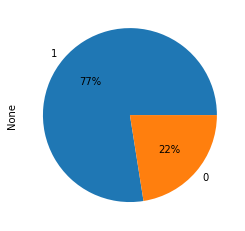

In [ ]:
pd.Series(kmeans.labels_).value_counts().plot.pie(autopct='%1.0f%%')

### CAH

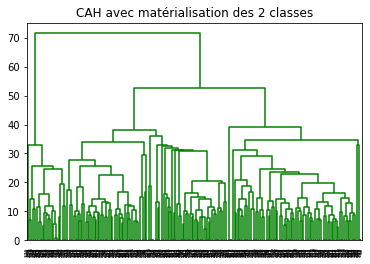

In [ ]:
#visualisation : dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des distances 
Z = linkage(scaled_data,method='ward',metric='euclidean')

#affichage du dendrogramme 
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=df.index,orientation='top',color_threshold=17500) 
plt.show()

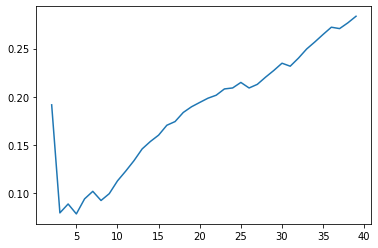

In [ ]:
#modelisation
from sklearn.cluster import AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_cah_tab = []
silhouette_cah_tab = []

for i in range(2,40):
    #modelisation
    cah = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cah.fit(scaled_data)
    # print(cah.labels_);
    y_pred_cah = cah.labels_
    y_pred_cah_tab.append(cah.labels_)
    #evaluation
    score = silhouette_score(scaled_data, cah.labels_, metric='euclidean')
    silhouette_cah = score
    # print('Silhouette Score: %.3f' % score)
    silhouette_cah_tab.append(score)

plt.plot(range(2,40),silhouette_cah_tab)


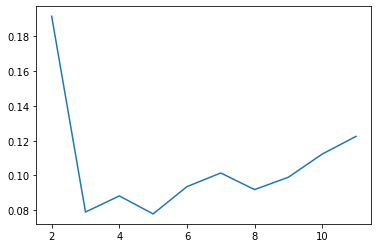

In [ ]:
plt.plot(range(2,12),silhouette_cah_tab[:10])

In [ ]:
silhouette_cah_tab
#on choisit 2 clusters
silhouette_cah = silhouette_cah_tab[0]

In [ ]:
#modelisation
cah = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cah.fit(scaled_data)
# print(cah.labels_);
#evaluation
score = silhouette_score(scaled_data, cah.labels_, metric='euclidean')
silhouette_cah = score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.192


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

chi_cah = metrics.calinski_harabasz_score(scaled_data, cah.labels_)
print('Calinski-Harabasz Index : %.3f' %chi_cah)

Calinski-Harabasz Index : 51.930


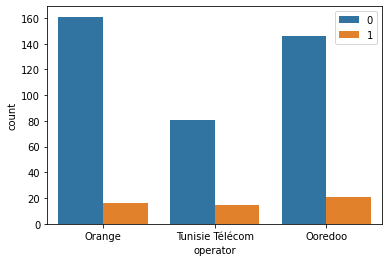

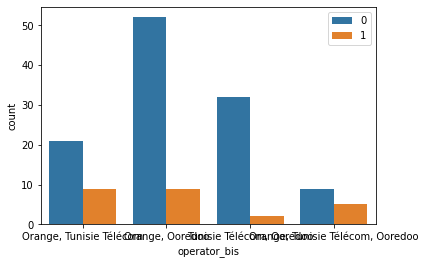

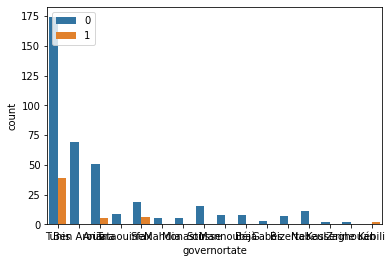

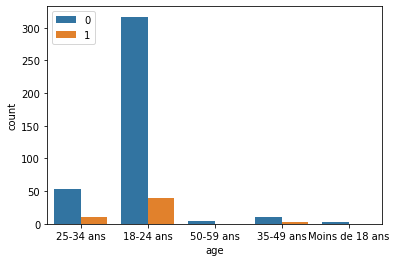

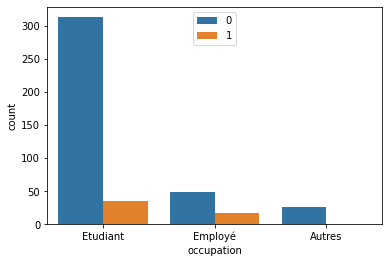

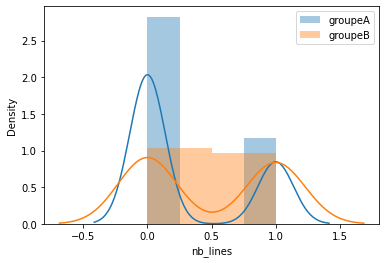

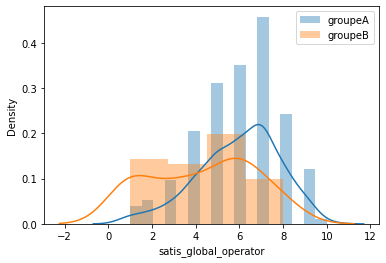

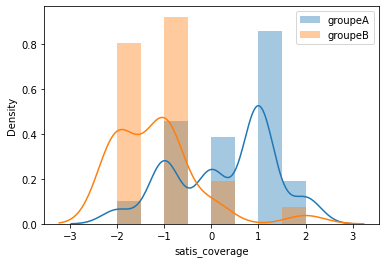

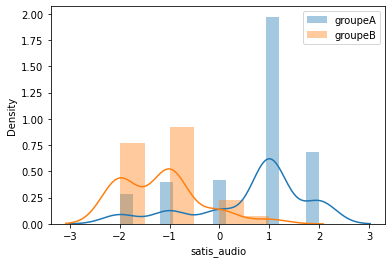

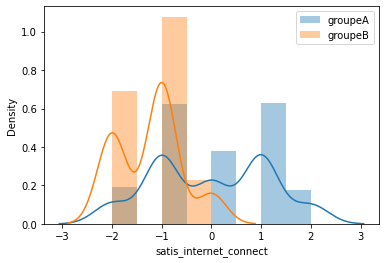

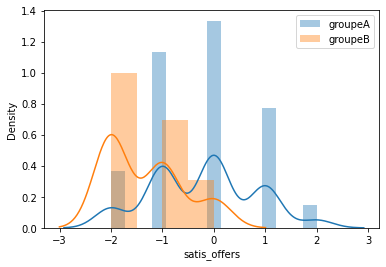

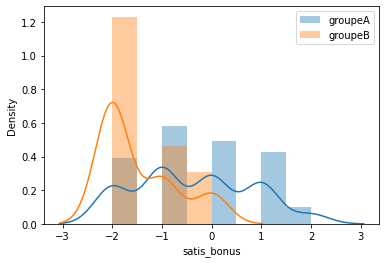

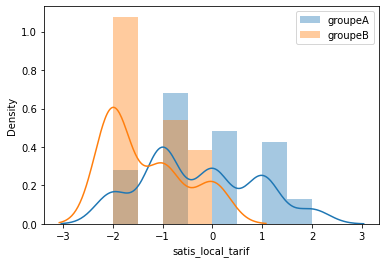

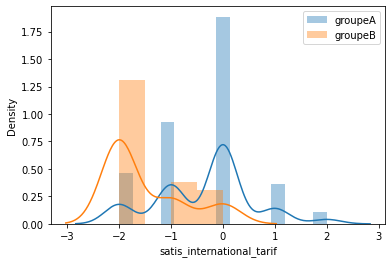

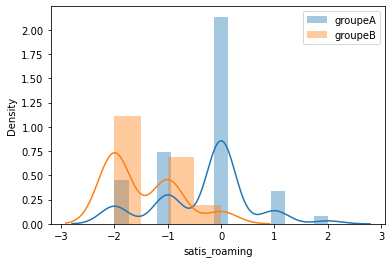

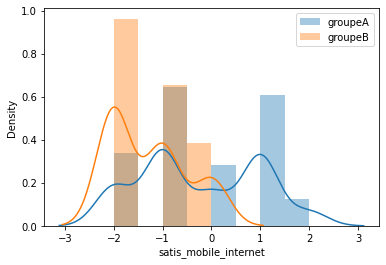

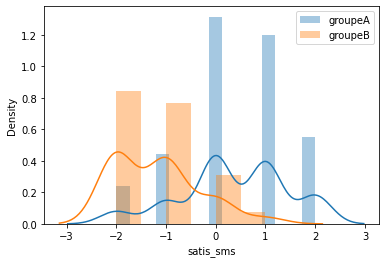

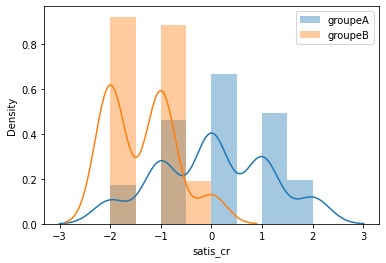

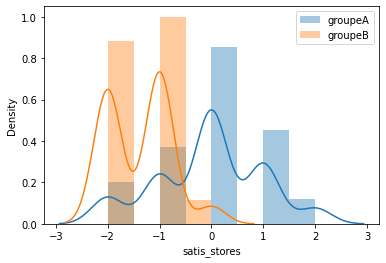

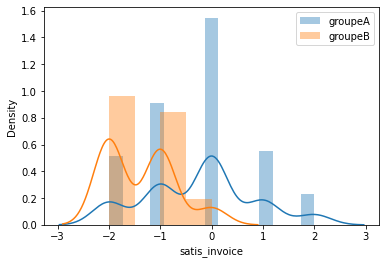

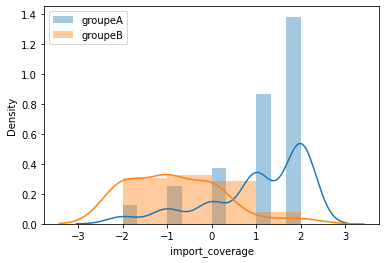

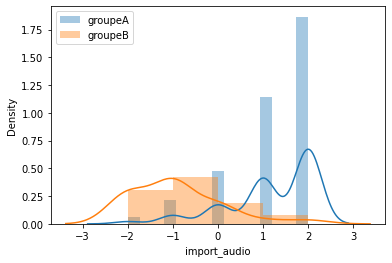

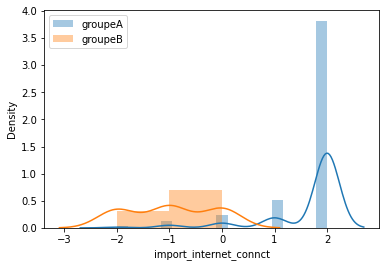

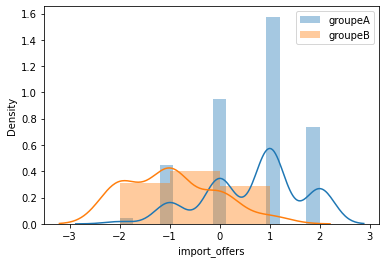

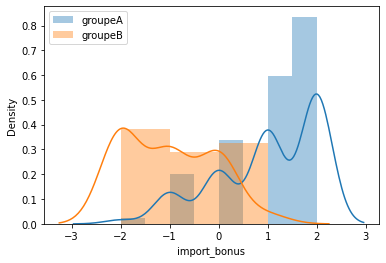

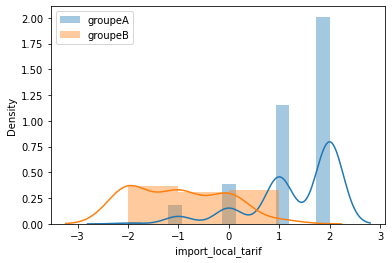

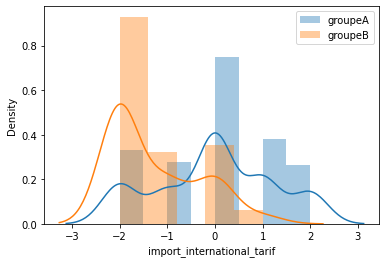

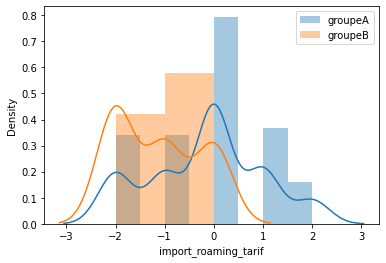

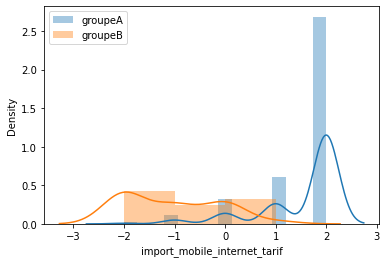

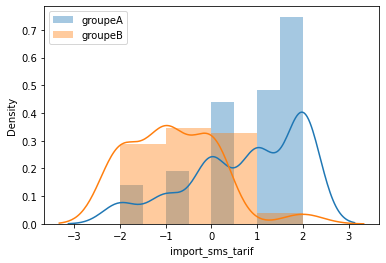

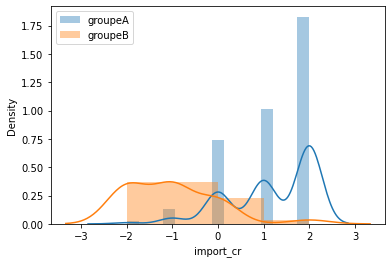

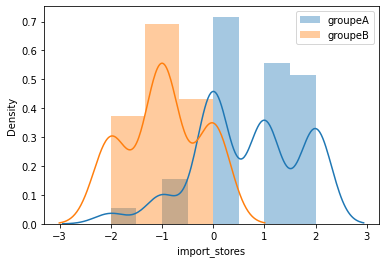

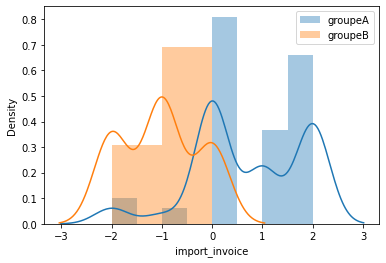

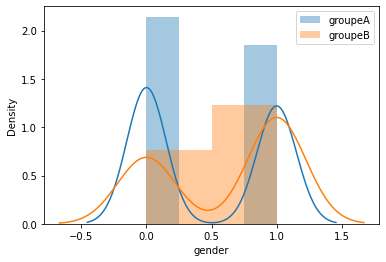

In [ ]:
#Profiling
groupeA=df[cah.labels_==0]

groupeB=df[cah.labels_==1]

data_predict_cah = df.copy()
data_predict_cah.insert(len(data_predict_cah.columns), "Profiling_cah", cah.labels_)


for col in (data_predict_cah.columns[data_predict_cah.dtypes==object]):
    plt.figure()
    sns.countplot(x=col,hue='Profiling_cah',data=data_predict_cah)
    plt.legend()
    
    
for col in (data_predict_cah.columns[data_predict_cah.dtypes!=object].drop('Profiling_cah')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    plt.legend()

### Comparaison

In [ ]:
silhouette = pd.Series([silhouette_km,silhouette_cah],  
        index=['K-Means', 'cah'])
accuracy = pd.DataFrame({'Silhouette': silhouette})
accuracy

,Silhouette
K-Means,0.190738
cah,0.191502


In [ ]:
Calinski_Harbaz_index = pd.Series([chi_kmeans,chi_cah],  
        index=['K-Means', 'cah'])
accuracy = pd.DataFrame({'C-H index': Calinski_Harbaz_index})
accuracy

,C-H index
K-Means,65.487843
cah,51.929769


On constate  que les deux algorithmes donnent les mêmes courbes.
On peut donc en conclure que les profils obtenus par les 2 méthodes sont identiques deux  à deux.

- Silhouette: Score décrivant la facilité  de séparer visuellement des clusters.
c'est une métrique  calculée en  utilisant la distance intra-cluster et la distance moyenne du plus proche cluster pour chaque individu. Un score de silhouette plus proche de 1 est plus désirable afin d'éviter l'empattement (overlapping)des clusters

- Indice de Calinski-Harbaz: Est relatif à la densité des clusters. Un plus grand index correspond à un meilleur  modèle  (clusters  plus denses).

==> K-Means obtient un meilleur (plus grand) score pour les deux métriques ==> Il s'agit du meilleur modèle.

## Profiling

D'après les résultats obtenus ainsi  que leurs observations, il est possible de dégager les 2 profils suivants:
* Profil A:
  * Assez sévèrent en notes ==> Globalement  Insatisfaits
  

* Profil B:
  * Profil formé majoritairement par des hommes
  * Majorité d'étudiants
  * Utilisent surtout Ooredoo et orange.
  * Moins stricts que le Profil A, globalement satisfaits.
